In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, LSTM, Dense
import yfinance as yf

import os


pd.options.mode.copy_on_write = True
data_dir = 'data'

2024-06-02 16:45:05.941799: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-02 16:45:05.945901: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-02 16:45:05.999144: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-02 16:45:07.093227: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
help(Input)

Help on function Input in module keras.src.layers.core.input_layer:

Input(shape=None, batch_size=None, dtype=None, sparse=None, batch_shape=None, name=None, tensor=None)
    Used to instantiate a Keras tensor.
    
    A Keras tensor is a symbolic tensor-like object, which we augment with
    certain attributes that allow us to build a Keras model just by knowing the
    inputs and outputs of the model.
    
    For instance, if `a`, `b` and `c` are Keras tensors,
    it becomes possible to do:
    `model = Model(input=[a, b], output=c)`
    
    Args:
        shape: A shape tuple (tuple of integers or `None` objects),
            not including the batch size.
            For instance, `shape=(32,)` indicates that the expected input
            will be batches of 32-dimensional vectors. Elements of this tuple
            can be `None`; `None` elements represent dimensions where the shape
            is not known and may vary (e.g. sequence length).
        batch_size: Optional static 

In [1]:
import os
import pandas as pd
import yfinance as yf
pd.options.mode.copy_on_write = True
data_dir = 'data'

In [9]:
def get_data(ticker_or_tickers, start_date=None, end_date=None):
    data = yf.download(ticker_or_tickers, start=start_date, end=end_date)
    return data

In [3]:
nvda = get_data('NVDA', '2020-01-01', '2024-01-01')
nvda

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,59.687500,59.977501,59.180000,59.977501,59.741238,23753600
2020-01-03,58.775002,59.457500,58.525002,59.017502,58.785019,20538400
2020-01-06,58.080002,59.317501,57.817501,59.264999,59.031551,26263600
2020-01-07,59.549999,60.442501,59.097500,59.982498,59.746216,31485600
2020-01-08,59.939999,60.509998,59.537498,60.095001,59.858276,27710800
...,...,...,...,...,...,...
2023-12-22,491.950012,493.829987,484.670013,488.299988,488.277069,25213900
2023-12-26,489.679993,496.000000,489.600006,492.790009,492.766907,24420000
2023-12-27,495.109985,496.799988,490.850006,494.170013,494.146820,23364800


In [44]:
test = get_data(['NVDA', 'TSM', 'INTC', 'AAPL', 'IBM', 'CSCO', 'AMD', 'MSFT'])
test


[*********************100%%**********************]  8 of 8 completed


Price        Adj Close                                                \
Ticker            AAPL         AMD       CSCO         IBM       INTC   
Date                                                                   
1962-01-02         NaN         NaN        NaN    1.526557        NaN   
1962-01-03         NaN         NaN        NaN    1.539900        NaN   
1962-01-04         NaN         NaN        NaN    1.524555        NaN   
1962-01-05         NaN         NaN        NaN    1.494532        NaN   
1962-01-08         NaN         NaN        NaN    1.466509        NaN   
...                ...         ...        ...         ...        ...   
2024-05-20  191.039993  166.330002  47.130001  169.919998  32.099998   
2024-05-21  192.350006  164.660004  46.939999  173.470001  31.740000   
2024-05-22  190.899994  165.520004  47.430000  173.690002  31.420000   
2024-05-23  186.880005  160.429993  46.599998  170.669998  30.080000   
2024-05-24  189.979996  166.360001  46.419998  170.889999  30.719999   

Price                                                 Close              ...  \
Ticker            MSFT         NVDA         TSM        AAPL         AMD  ...   
Date                                                                     ...   
1962-01-02         NaN          NaN         NaN         NaN         NaN  ...   
1962-01-03         NaN          NaN         NaN         NaN         NaN  ...   
1962-01-04         NaN          NaN         NaN         NaN         NaN  ...   
1962-01-05         NaN          NaN         NaN         NaN         NaN  ...   
1962-01-08         NaN          NaN         NaN         NaN         NaN  ...   
...                ...          ...         ...         ...         ...  ...   
2024-05-20  425.339996   947.799988  153.550003  191.039993  166.330002  ...   
2024-05-21  429.040009   953.859985  153.669998  192.350006  164.660004  ...   
2024-05-22  430.519989   949.500000  156.149994  190.899994  165.520004  ...   
2024-05-23  427.000000  1037.989990  157.089996  186.880005  160.429993  ...   
2024-05-24  430.160004  1064.689941  160.000000  189.979996  166.360001  ...   

Price              Open                  Volume                          \
Ticker             NVDA         TSM        AAPL         AMD        CSCO   
Date                                                                      
1962-01-02          NaN         NaN         NaN         NaN         NaN   
1962-01-03          NaN         NaN         NaN         NaN         NaN   
1962-01-04          NaN         NaN         NaN         NaN         NaN   
1962-01-05          NaN         NaN         NaN         NaN         NaN   
1962-01-08          NaN         NaN         NaN         NaN         NaN   
...                 ...         ...         ...         ...         ...   
2024-05-20   937.500000  151.669998  44361300.0  45618000.0  22040700.0   
2024-05-21   935.989990  152.300003  42309400.0  30005500.0  25172200.0   
2024-05-22   954.590027  155.880005  34648500.0  47426700.0  19940600.0   
2024-05-23  1020.280029  159.179993  51005900.0  91888800.0  18837500.0   
2024-05-24  1044.489990  157.199997  36294600.0  54795400.0  11933600.0   

Price                                                                
Ticker          IBM        INTC        MSFT        NVDA         TSM  
Date                                                                 
1962-01-02   407940         NaN         NaN         NaN         NaN  
1962-01-03   305955         NaN         NaN         NaN         NaN  
1962-01-04   274575         NaN         NaN         NaN         NaN  
1962-01-05   384405         NaN         NaN         NaN         NaN  
1962-01-08   572685         NaN         NaN         NaN         NaN  
...             ...         ...         ...         ...         ...  
2024-05-20  2726300  31989000.0  16272100.0  31876400.0   9261200.0  
2024-05-21  6459800  42975400.0  21453300.0  32894600.0   7919400.0  
2024-05-22  3294900  36706400.0  18073700.0  5486

In [45]:
test.to_csv(os.path.join(data_dir, 'historical_data_samples.csv'))

In [55]:
# https://medium.com/@gotashirato/how-to-import-csv-file-with-multi-level-columns-python-basics-and-a-question-b67cbbbc174d
test = pd.read_csv(os.path.join(data_dir, 'historical_data_samples.csv'), index_col=0, header=[0, 1], skipinitialspace=True, parse_dates=True)
test

Price        Adj Close                                                \
Ticker            AAPL         AMD       CSCO         IBM       INTC   
Date                                                                   
1962-01-02         NaN         NaN        NaN    1.526557        NaN   
1962-01-03         NaN         NaN        NaN    1.539900        NaN   
1962-01-04         NaN         NaN        NaN    1.524555        NaN   
1962-01-05         NaN         NaN        NaN    1.494532        NaN   
1962-01-08         NaN         NaN        NaN    1.466509        NaN   
...                ...         ...        ...         ...        ...   
2024-05-20  191.039993  166.330002  47.130001  169.919998  32.099998   
2024-05-21  192.350006  164.660004  46.939999  173.470001  31.740000   
2024-05-22  190.899994  165.520004  47.430000  173.690002  31.420000   
2024-05-23  186.880005  160.429993  46.599998  170.669998  30.080000   
2024-05-24  189.979996  166.360001  46.419998  170.889999  30.719999   

Price                                                 Close              ...  \
Ticker            MSFT         NVDA         TSM        AAPL         AMD  ...   
Date                                                                     ...   
1962-01-02         NaN          NaN         NaN         NaN         NaN  ...   
1962-01-03         NaN          NaN         NaN         NaN         NaN  ...   
1962-01-04         NaN          NaN         NaN         NaN         NaN  ...   
1962-01-05         NaN          NaN         NaN         NaN         NaN  ...   
1962-01-08         NaN          NaN         NaN         NaN         NaN  ...   
...                ...          ...         ...         ...         ...  ...   
2024-05-20  425.339996   947.799988  153.550003  191.039993  166.330002  ...   
2024-05-21  429.040009   953.859985  153.669998  192.350006  164.660004  ...   
2024-05-22  430.519989   949.500000  156.149994  190.899994  165.520004  ...   
2024-05-23  427.000000  1037.989990  157.089996  186.880005  160.429993  ...   
2024-05-24  430.160004  1064.689941  160.000000  189.979996  166.360001  ...   

Price              Open                  Volume                          \
Ticker             NVDA         TSM        AAPL         AMD        CSCO   
Date                                                                      
1962-01-02          NaN         NaN         NaN         NaN         NaN   
1962-01-03          NaN         NaN         NaN         NaN         NaN   
1962-01-04          NaN         NaN         NaN         NaN         NaN   
1962-01-05          NaN         NaN         NaN         NaN         NaN   
1962-01-08          NaN         NaN         NaN         NaN         NaN   
...                 ...         ...         ...         ...         ...   
2024-05-20   937.500000  151.669998  44361300.0  45618000.0  22040700.0   
2024-05-21   935.989990  152.300003  42309400.0  30005500.0  25172200.0   
2024-05-22   954.590027  155.880005  34648500.0  47426700.0  19940600.0   
2024-05-23  1020.280029  159.179993  51005900.0  91888800.0  18837500.0   
2024-05-24  1044.489990  157.199997  36294600.0  54795400.0  11933600.0   

Price                                                                
Ticker          IBM        INTC        MSFT        NVDA         TSM  
Date                                                                 
1962-01-02   407940         NaN         NaN         NaN         NaN  
1962-01-03   305955         NaN         NaN         NaN         NaN  
1962-01-04   274575         NaN         NaN         NaN         NaN  
1962-01-05   384405         NaN         NaN         NaN         NaN  
1962-01-08   572685         NaN         NaN         NaN         NaN  
...             ...         ...         ...         ...         ...  
2024-05-20  2726300  31989000.0  16272100.0  31876400.0   9261200.0  
2024-05-21  6459800  42975400.0  21453300.0  32894600.0   7919400.0  
2024-05-22  3294900  36706400.0  18073700.0  5486

# Find the earliest date with a non null value for each stock symbol

In [56]:
df = test
# Extract the unique stock symbols from the MultiIndex columns
stock_symbols = df.columns.get_level_values(1).unique()

# Initialize a dictionary to store the results
earliest_dates = {}

# Iterate over each stock symbol to find the first non-null date
for symbol in stock_symbols:
    non_null_dates = df.loc[:, (slice(None), symbol)].dropna(how='all').index
    if not non_null_dates.empty:
        earliest_dates[symbol] = non_null_dates[0]

# Convert the dictionary to a DataFrame for better visualization
earliest_dates_df = pd.DataFrame(list(earliest_dates.items()), columns=['Stock Symbol', 'Earliest Date'])



# Display the result
earliest_dates_df

,Stock Symbol,Earliest Date
0,AAPL,1980-12-12
1,AMD,1980-03-17
2,CSCO,1990-02-16
3,IBM,1962-01-02
4,INTC,1980-03-17
5,MSFT,1986-03-13
6,NVDA,1999-01-22
7,TSM,1997-10-09


In [37]:
pct_change = test['Adj Close'].pct_change()

# https://stackoverflow.com/a/73197082 : MultiIndex columns
test[[('Adj Close % Change', col) for col in pct_change.columns]] = pct_change
test

<Axes: xlabel='Date'>

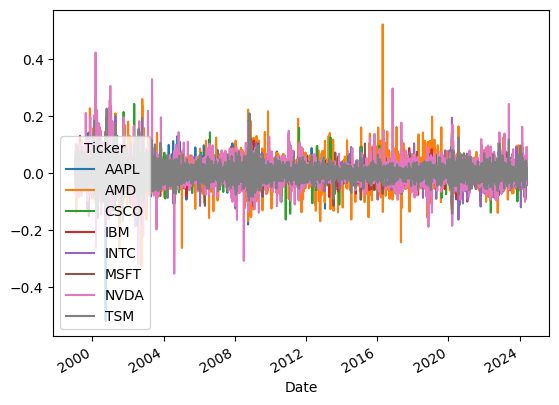

In [40]:
test['Adj Close % Change'] 

In [35]:
test.columns

MultiIndex([('Adj Close', 'AAPL'),
            ('Adj Close',  'AMD'),
            ('Adj Close', 'CSCO'),
            ('Adj Close',  'IBM'),
            ('Adj Close', 'INTC'),
            ('Adj Close', 'MSFT'),
            ('Adj Close', 'NVDA'),
            ('Adj Close',  'TSM'),
            (    'Close', 'AAPL'),
            (    'Close',  'AMD'),
            (    'Close', 'CSCO'),
            (    'Close',  'IBM'),
            (    'Close', 'INTC'),
            (    'Close', 'MSFT'),
            (    'Close', 'NVDA'),
            (    'Close',  'TSM'),
            (     'High', 'AAPL'),
            (     'High',  'AMD'),
            (     'High', 'CSCO'),
            (     'High',  'IBM'),
            (     'High', 'INTC'),
            (     'High', 'MSFT'),
            (     'High', 'NVDA'),
            (     'High',  'TSM'),
            (      'Low', 'AAPL'),
            (      'Low',  'AMD'),
            (      'Low', 'CSCO'),
            (      'Low',  'IBM'),
            (      '

In [17]:
test = test.dropna()

In [23]:
test.index.to_series().diff().dt.days

Date
1999-01-22    NaN
1999-01-25    3.0
1999-01-26    1.0
1999-01-27    1.0
1999-01-28    1.0
             ... 
2024-05-20    3.0
2024-05-21    1.0
2024-05-22    1.0
2024-05-23    1.0
2024-05-24    1.0
Name: Date, Length: 6377, dtype: float64

<Axes: xlabel='Date'>

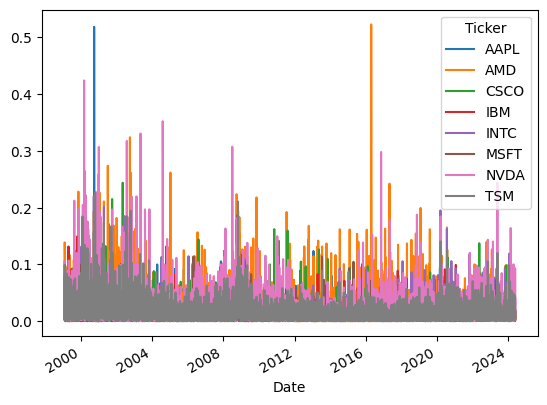

In [32]:
#test['Adj Close Derivative'] = 
test['Adj Close'].pct_change().abs().dropna().plot()

<Axes: xlabel='Date'>

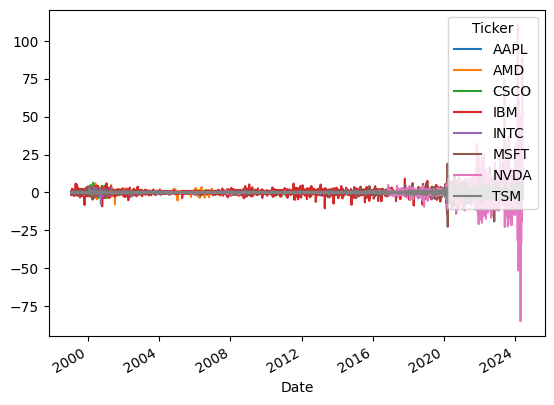